In [615]:
import numpy as np
import pandas as pd

In [616]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")

train.shape, test.shape

((891, 12), (418, 11))

In [617]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [618]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [619]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [620]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [621]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [622]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [623]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [624]:
def bar_chart(feature):
    survived = train[train["Survived"]==1][feature].value_counts()
    dead = train[train["Survived"]==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10, 6))

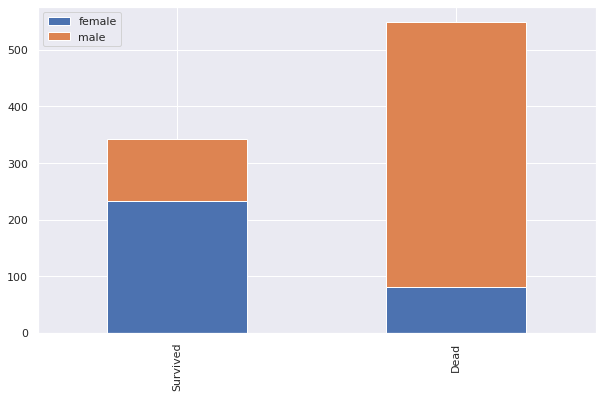

In [625]:
bar_chart('Sex')

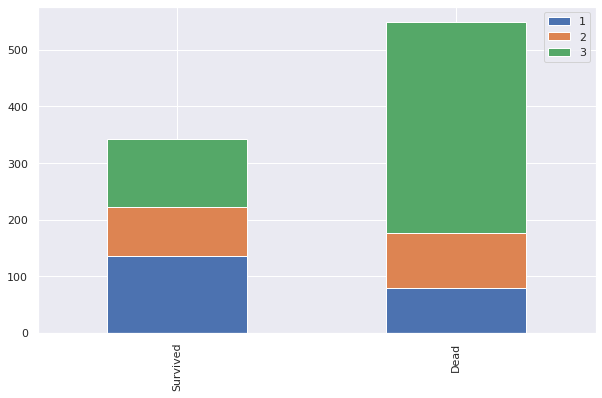

In [626]:
bar_chart('Pclass')

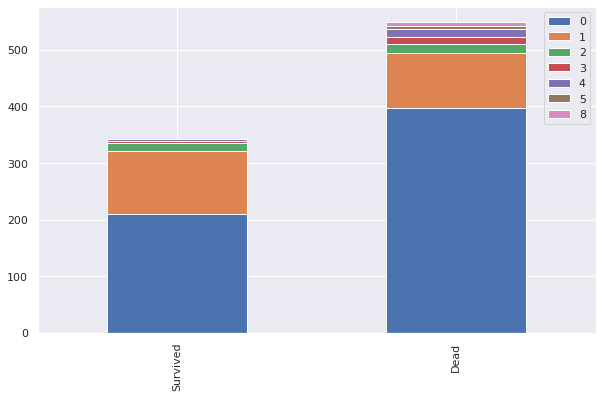

In [627]:
bar_chart('SibSp')

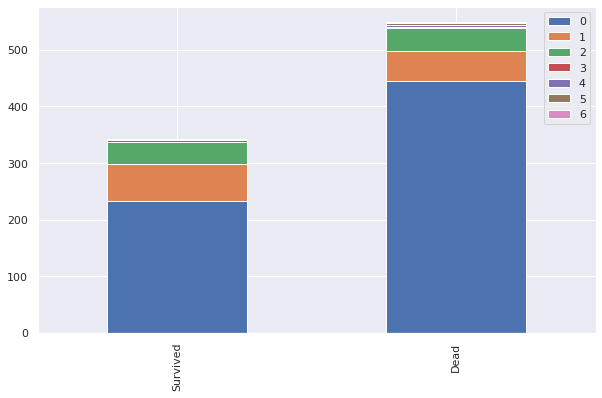

In [628]:
bar_chart('Parch')

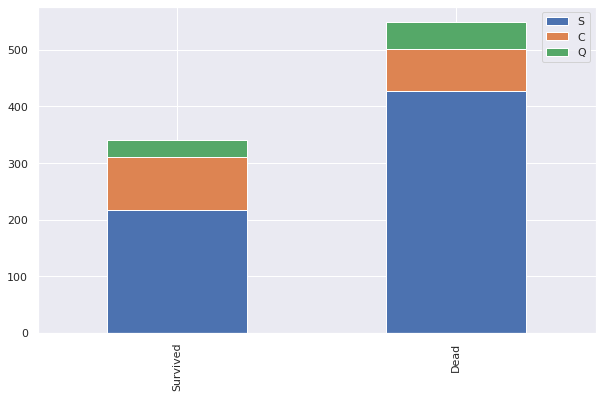

In [629]:
bar_chart('Embarked')

In [630]:
# ikki datasetni birlashtiramiz
train_test_data = [train, test]

# data setlarda yangi column yaratamiz, name ichidan malaumotlarni olib
for dataset in train_test_data:
    dataset["Title"] = dataset["Name"].str.extract( "([A-Za-z]+)\.", expand=False) 

In [631]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [632]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2,
                 "Master":3,"Dr": 3,"Rev": 3,"Mlle": 3,"Major": 3,"Col": 3,"Countess": 3,"Capt": 3,"Ms": 3,"Sir": 3, "Lady": 3, "Mme": 3, "Don": 3, "Dona":3, "Jonkheer": 3} 

for dataset in train_test_data:
    dataset["Title"] = dataset["Title"].map(title_mapping)

In [633]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


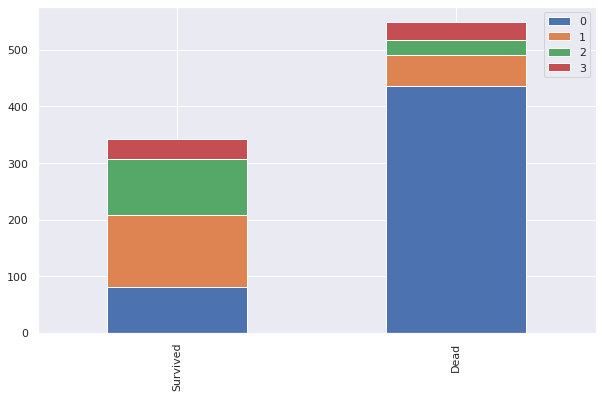

In [634]:
bar_chart('Title')

In [635]:
# Name ustunini o'chirib yuboramiz
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [636]:
# Sex ustunini guruhlaymiz
sex_mapping = {'male': 0, 'female': 1}

for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

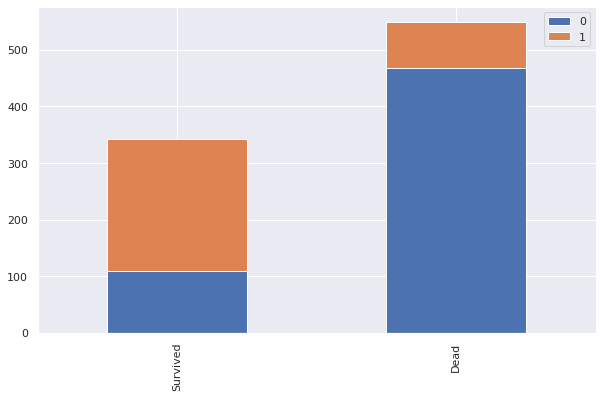

In [637]:
bar_chart('Sex')

In [638]:
# Age ustunidagi yetishmayotgan qiymatlarn o'rtacha qiymatlar bilan to'ldiramiz
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

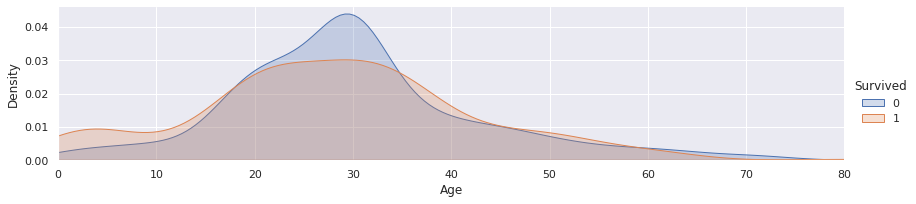

In [639]:
# barcha yoshdagilar uchun
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.show()

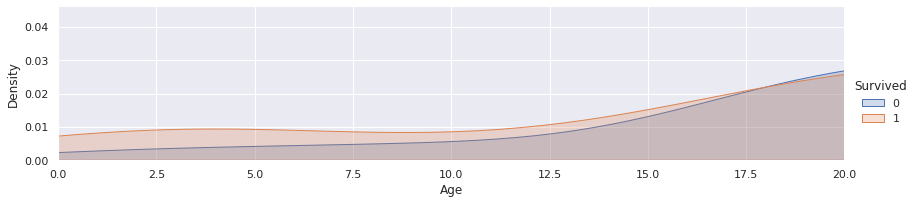

In [640]:
# 0 dan 20 yoshgacha oraliqdagilar
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(0, 20)

plt.show()

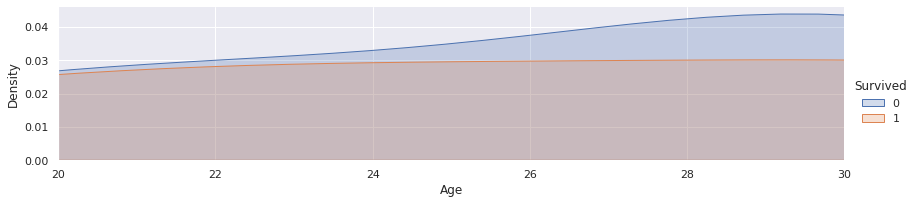

In [641]:
# 20 dan 30 yoshgacha oraliqdagilar
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(20, 30)

plt.show()

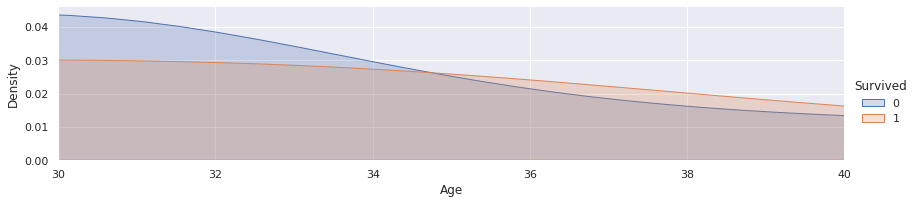

In [642]:
# 30 dan 40 yoshgacha oraliqdagilar
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(30, 40)

plt.show()

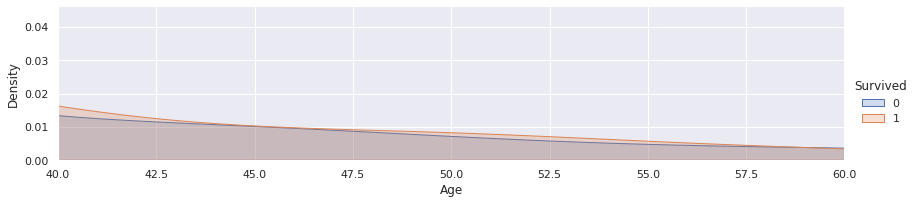

In [643]:
# 40 dan 60 yoshgacha oraliqdagilar
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(40, 60)

plt.show()

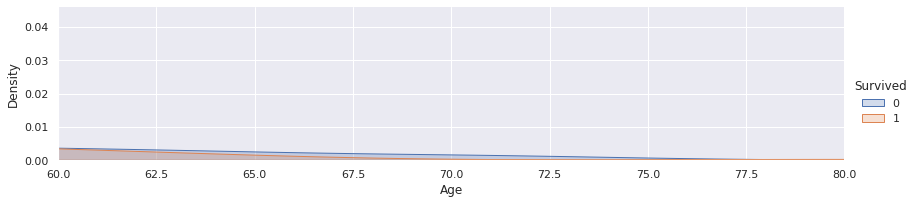

In [644]:
# 60 dan 80 yoshgacha oraliqdagilar
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(60, 80)

plt.show()

In [645]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [646]:
train['Cabin'].isnull().value_counts()

True     687
False    204
Name: Cabin, dtype: int64

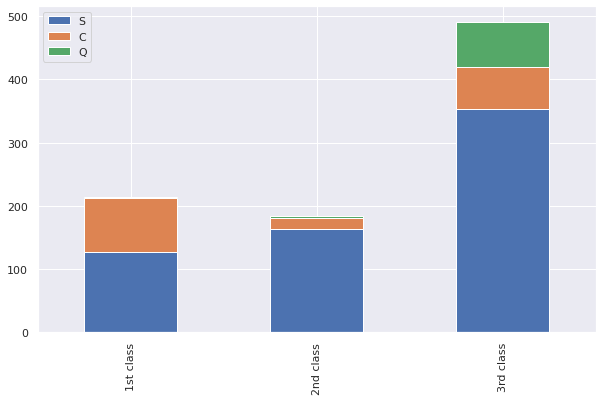

In [647]:
# Embarked ustunidagi tushib qolgan qiymatlarni to'ldirish un chipta clsss laridan foydalanamiz
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,6))
plt.show()

In [648]:
# bar_chart dagi ma'lumotdan foydalanib Embarked dagi tushib qolgan malumot qiymatlarini to'ldiramiz
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [649]:
embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [650]:
# bizga berilgan numerik narxlarni kategoriyalarga almashtiramiz
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [651]:
for dataset in train_test_data:
    dataset.loc[dataset["Age"] <= 16, "Age"] = 0
    dataset.loc[(dataset["Age"] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
    dataset.loc[(dataset["Age"] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
    dataset.loc[(dataset["Age"] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    dataset.loc[dataset["Age"] > 62, "Age"] = 4

In [652]:
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [653]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

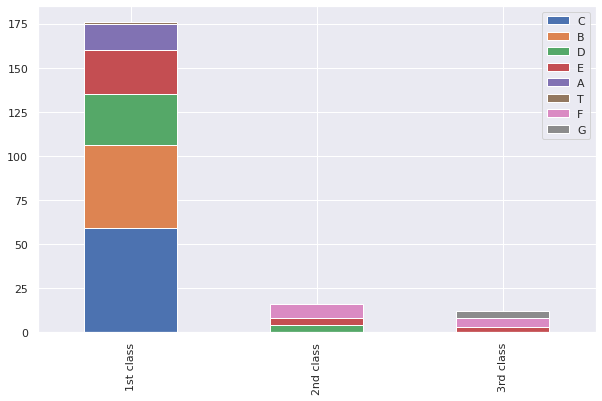

In [654]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,6))
plt.show()

In [655]:
# guruhlaymiz
cabin_mapping = {'A': 0, 'B': 0.4, 'C': 0.8, 'D': 1.2, 'E': 1.6, 'F': 2, 'G': 2.4, 'T': 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [656]:
# nan qiymatlarni to'ldiramiz
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'), inplace=True)
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'), inplace=True)

In [657]:
# FamilySize ustunini yaratamiz
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

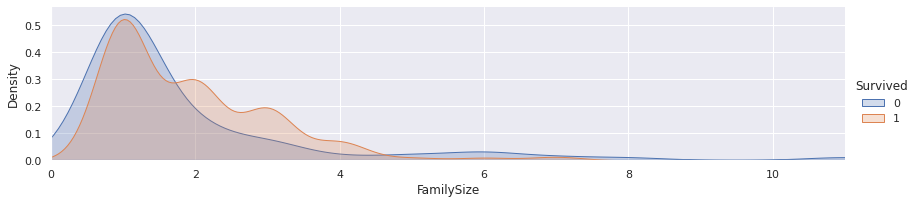

In [658]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'FamilySize', shade=True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

plt.show()

In [659]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [660]:
features_drop = ['Ticket', 'SibSp', 'Parch', 'Cabin', 'Embarked', 'Title', 'Age']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [661]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 4), (891,))

In [662]:
train.head()

,Survived,Pclass,Sex,Fare,FamilySize
0,0,3,0,0.0,0.4
1,1,1,1,2.0,0.4
2,1,3,1,0.0,0.0
3,1,1,1,2.0,0.4
4,0,3,0,0.0,0.0


In [663]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Fare        891 non-null    float64
 4   FamilySize  891 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 34.9 KB


In [664]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Fare         417 non-null    float64
 4   FamilySize   418 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 16.5 KB


In [665]:
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'), inplace=True)
test.head(10)

,PassengerId,Pclass,Sex,Fare,FamilySize
0,892,3,0,0.0,0.0
1,893,3,1,0.0,0.4
2,894,2,0,0.0,0.0
3,895,3,0,0.0,0.0
4,896,3,1,0.0,0.8
5,897,3,0,0.0,0.0
6,898,3,1,0.0,0.0
7,899,2,0,1.0,0.8
8,900,3,1,0.0,0.0
9,901,3,0,1.0,0.8


In [666]:
train.head()

,Survived,Pclass,Sex,Fare,FamilySize
0,0,3,0,0.0,0.4
1,1,1,1,2.0,0.4
2,1,3,1,0.0,0.0
3,1,1,1,2.0,0.4
4,0,3,0,0.0,0.0


In [667]:
train_data.head()

,Pclass,Sex,Fare,FamilySize
0,3,0,0.0,0.4
1,1,1,2.0,0.4
2,3,1,0.0,0.0
3,1,1,2.0,0.4
4,3,0,0.0,0.0


In [668]:
# 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [669]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [670]:
clf = KNeighborsClassifier(n_neighbors=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.79775281 0.79775281 0.68539326 0.83146067 0.7752809
 0.7752809  0.79775281 0.82022472 0.79775281]


In [671]:
# kNN score
round(np.mean(score)*100, 2)

79.01

In [672]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81111111 0.84269663 0.79775281 0.78651685 0.84269663 0.7752809
 0.80898876 0.79775281 0.76404494 0.78651685]


In [673]:
# Decision Tree score
round(np.mean(score)*100, 2)

80.13

In [674]:
clf = RandomForestClassifier(n_estimators=100)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81111111 0.80898876 0.78651685 0.78651685 0.83146067 0.7752809
 0.82022472 0.78651685 0.75280899 0.7752809 ]


In [675]:
# Random Forest score
round(np.mean(score)*100, 2)

79.35

In [676]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.85555556 0.80898876 0.7752809  0.68539326 0.71910112 0.76404494
 0.74157303 0.80898876 0.86516854 0.79775281]


In [677]:
# GaussianNB score
round(np.mean(score)*100, 2)

78.22

In [678]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.78651685 0.79775281 0.78651685 0.80898876 0.78651685
 0.78651685 0.83146067 0.82022472 0.79775281]


In [679]:
# SVC score
round(np.mean(score)*100, 2)

80.36

In [680]:
# KNeighbors
clf = KNeighborsClassifier(n_neighbors=13)
clf.fit(train_data, target)
test_data = test.drop("PassengerId", axis=1).copy()
prediction_knn = clf.predict(test_data)

In [681]:
# Random Forest
clf = RandomForestClassifier(n_estimators=100)
clf.fit(train_data, target)
test_data = test.drop("PassengerId", axis=1).copy()
prediction_rf = clf.predict(test_data)

In [682]:
# SVC model
clf = SVC()
clf.fit(train_data, target)
test_data = test.drop("PassengerId", axis=1).copy()
prediction_svc = clf.predict(test_data)

In [683]:
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': prediction_knn
})
submission.to_csv('submission.csv', index=False)

In [684]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [685]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

In [686]:
test_data

,Pclass,Sex,Fare,FamilySize
0,3,0,0.0,0.0
1,3,1,0.0,0.4
2,2,0,0.0,0.0
3,3,0,0.0,0.0
4,3,1,0.0,0.8
...,...,...,...,...
413,3,0,0.0,0.0
414,1,1,3.0,0.0
415,3,0,0.0,0.0
416,3,0,0.0,0.0


In [687]:
# defining the model by defining class_weight={1:0.7}
logistic_reg = LogisticRegression(random_state = 72, class_weight={1:0.7})
# training the model
logistic_reg.fit(train_data, target)
# prediction the model
prediction_logr = logistic_reg.predict(test_data)

In [688]:
clf = LogisticRegression(random_state = 72, class_weight={1:0.7})
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81111111 0.78651685 0.79775281 0.78651685 0.84269663 0.79775281
 0.79775281 0.78651685 0.82022472 0.78651685]


In [691]:
# Searching best class_weight value using GridSearchCV
class_weights = [{1: i*0.01} for i in range(1, 100, 2)]

param_grid = {"class_weight": class_weights}

logistic_reg = LogisticRegression(random_state=72)
lr_grid = GridSearchCV(estimator = logistic_reg, param_grid = param_grid, cv=100, verbose=1, n_jobs = -1)

lr_grid.fit(train_data, target)

Fitting 100 folds for each of 50 candidates, totalling 5000 fits


GridSearchCV(cv=100, estimator=LogisticRegression(random_state=72), n_jobs=-1,
             param_grid={'class_weight': [{1: 0.01}, {1: 0.03}, {1: 0.05},
                                          {1: 0.07}, {1: 0.09}, {1: 0.11},
                                          {1: 0.13}, {1: 0.15}, {1: 0.17},
                                          {1: 0.19}, {1: 0.21}, {1: 0.23},
                                          {1: 0.25}, {1: 0.27}, {1: 0.29},
                                          {1: 0.31}, {1: 0.33},
                                          {1: 0.35000000000000003}, {1: 0.37},
                                          {1: 0.39}, {1: 0.41000000000000003},
                                          {1: 0.43}, {1: 0.45},
                                          {1: 0.47000000000000003}, {1: 0.49},
                                          {1: 0.51}, {1: 0.53}, {1: 0.55},
                                          {1: 0.5700000000000001}, {1: 0.59}, ...]},
             verbose=

In [689]:
# LogisticRegression score
round(np.mean(score)*100, 2)

80.13

In [690]:
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': prediction_logr
})
submission.to_csv('submission.csv', index=False)